In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [125]:
path = '../predictions1week/'
bot_prob = 0.9 # threshold for bot accounts

## Load dataset

In [126]:
df = pd.DataFrame()

for filename in os.listdir(path):
    if filename[-4:] == ".csv":
        print(filename)
        temp = pd.read_csv(path + filename, lineterminator = '\n')
        df = pd.concat([ df, temp ])

print(df.shape)
df.head()

predictions262728.csv
predictions293031.csv
(377534, 18)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,bot,no_bot
0,567289542,Saudi_Gazette,Saudi Gazette is a leading English language da...,Saudi Arabia,2,388279,127237,2012-04-30 13:01:28.000000,1507507623624646664,2022-03-26 00:00:00,1,#Ukraine: General Assembly passes resolution d...,"[{'text': 'Ukraine', 'indices': [0, 8]}]",NaN,2,2022-03-26 00:09:04.163917,0.0,1.0
1,1142687555625738240,Steed0905,いったんバイクアカウント停止します。\n今後はウクライナの情報を流していきます。\n嫌な方は...,NaN,396,324,4242,2019-06-23 06:55:18.000000,1507507622936657920,2022-03-26 00:00:00,265,#Ukraine: It seems that the 🚫 on this Russian ...,"[{'text': 'Ukraine', 'indices': [15, 23]}]",NaN,0,2022-03-26 00:09:04.196237,0.0,1.0
2,770241326172418048,NGOnewsTW,"inspired by @GovNewsTW, tweets, videos and we...",Taiwan,106,516,43798,2016-08-29 12:46:57.000000,1507507625256177690,2022-03-26 00:00:00,0,[伊甸基金會推文] @edenfortaiwan: 「RT @Trending_Taiwan...,"[{'text': 'StandWithUkraine', 'indices': [122,...",NaN,0,2022-03-26 00:03:14.849212,0.0,1.0
3,1498353133042507787,ArmedMaidan,News about Russia's war on Ukraine from award-...,"Quebec, Canada",292,396,1031,2022-02-28 17:43:30.000000,1507507623335280641,2022-03-26 00:00:00,2,#Putin's WWII obsession hindering invasion of ...,"[{'text': 'Putin', 'indices': [0, 6]}, {'text'...",NaN,1,2022-03-26 00:23:57.198251,0.0,1.0
4,1496075956062146563,IsPutinDeadYet,We're the first-ever socially driven #blockcha...,NaN,475,253,715,2022-02-22 10:54:53.000000,1507507626933817346,2022-03-26 00:00:01,1,Do you love playing Real-time shooters? #Ukrai...,"[{'text': 'Ukrainians', 'indices': [40, 51]}, ...",NaN,1,2022-03-26 00:09:04.155853,0.0,1.0


## Distribution of bot prediction labels for accounts

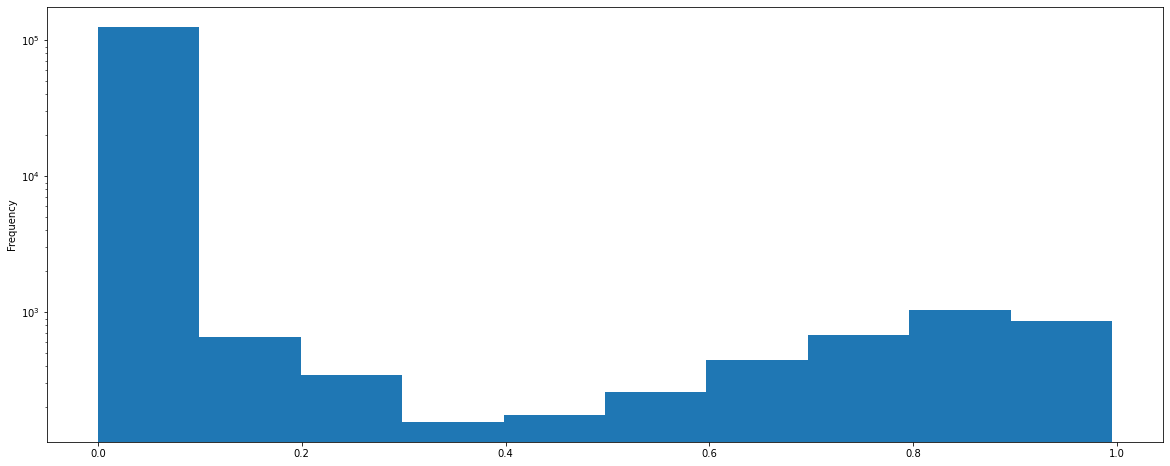

In [146]:
df.drop_duplicates('userid')['bot'].plot(x = 'bot prediction', kind = 'hist', logy = True)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

Let's check out the bot accounts 

In [128]:
df_bottweets = df[df['bot'] > bot_prob]
print(df_bottweets.shape)
df_botaccounts = df_bottweets.drop_duplicates('userid')
print(df_botaccounts.shape)

(2214, 18)
(1076, 18)


### Number of tweets per bot account

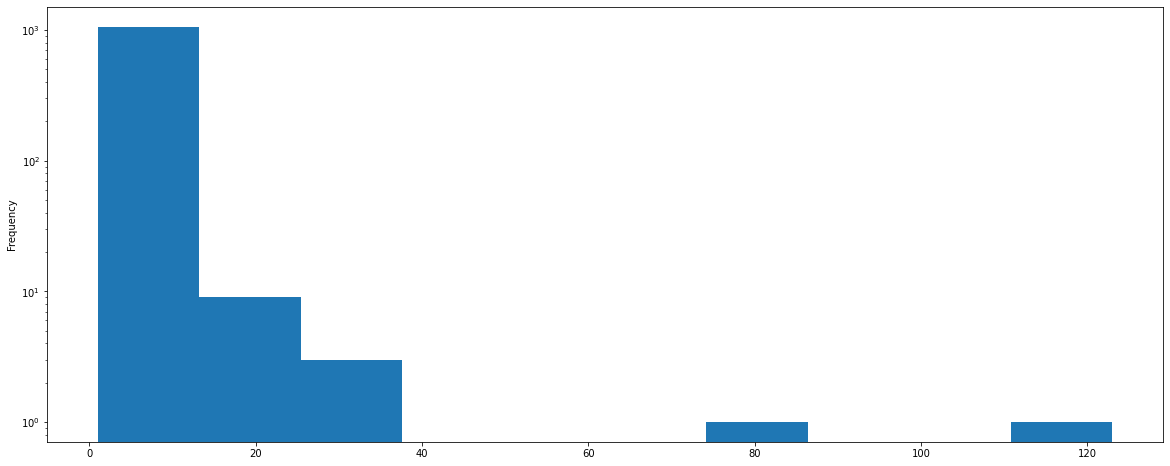

In [148]:
df_bottweets.groupby(['userid'])['tweetid'].count().plot(x = 'number of tweets', kind = 'hist', logy = True)
plt.show()

In [130]:
df_bottweets.groupby(['userid'])['tweetid'].count().sort_values(ascending = False)

userid
1387324144929419265    123
1509194192785879042     77
1502614845329657860     37
1502987879521431554     30
940474547366703106      26
                      ... 
1495489511605866497      1
1495794734018748418      1
1495831643256414215      1
1495917720172470274      1
1509625146696474637      1
Name: tweetid, Length: 1076, dtype: int64

Filtering retweets/tweets with same text

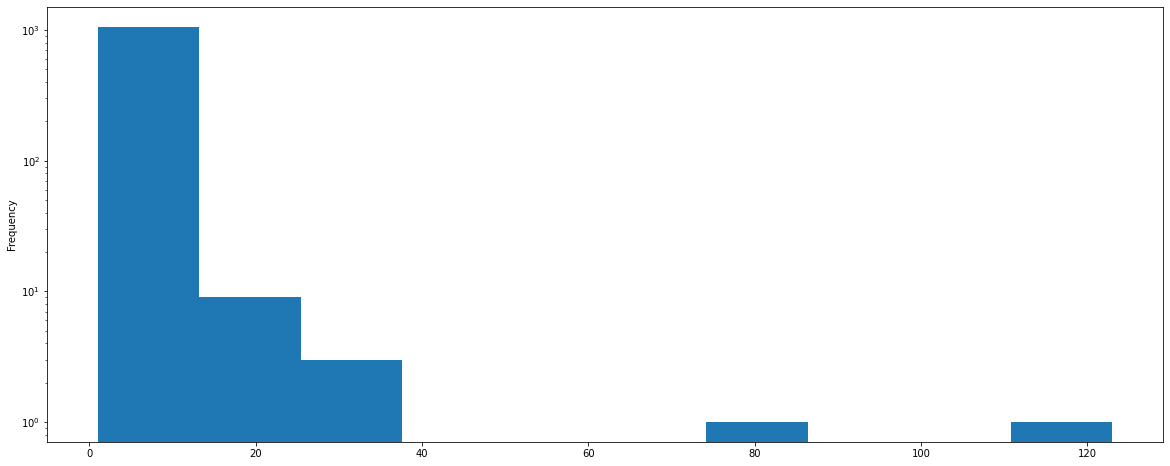

In [147]:
df_bottweets.drop_duplicates(['text']).groupby(['userid'])['tweetid'].count().plot(kind = 'hist', logy = True)
plt.show()

In [132]:
df_bottweets.drop_duplicates(['text']).groupby(['userid'])['tweetid'].count().sort_values(ascending = False)

userid
1387324144929419265    123
1509194192785879042     77
1502614845329657860     37
1502987879521431554     30
940474547366703106      26
                      ... 
1498928213594095617      1
1388123693080104963      1
1388068321057284098      1
1387706455642492928      1
1509625146696474637      1
Name: tweetid, Length: 1069, dtype: int64

In [133]:
# Most active bot (it just spams the same tweet with minimal changes)
df_most_active_bot = df_bottweets[df_bottweets['userid'] == 1387324144929419265]
print(df_most_active_bot.shape)
df_most_active_bot.head()

(123, 18)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,bot,no_bot
42956,1387324144929419265,FreedKomet,NaN,NaN,30,0,15,2021-04-28 08:33:59.000000,1507740663009497093,2022-03-26 15:26:01,0,@ITB_Berlin @TUIDeutschland @DEhospitality @BM...,"[{'text': 'Alexey_Mordashov', 'indices': [85, ...",NaN,0,2022-03-26 15:35:05.609823,0.963469,0.036531
43043,1387324144929419265,FreedKomet,NaN,NaN,30,0,15,2021-04-28 08:33:59.000000,1507741000009138178,2022-03-26 15:27:21,0,@TUIDeutschland @derbuerger16 @dertouristik @A...,"[{'text': 'Billionaire', 'indices': [73, 85]},...",NaN,0,2022-03-26 15:35:03.365207,0.969319,0.030681
43104,1387324144929419265,FreedKomet,NaN,NaN,30,0,15,2021-04-28 08:33:59.000000,1507741247636754439,2022-03-26 15:28:20,0,@TUIDeutschland @turkeyonline Shame on YOU!\n#...,"[{'text': 'Billionaire', 'indices': [44, 56]},...",NaN,0,2022-03-26 15:35:01.192162,0.914658,0.085342
43509,1387324144929419265,FreedKomet,NaN,NaN,30,0,17,2021-04-28 08:33:59.000000,1507743582714839052,2022-03-26 15:37:37,0,#UkraineUnderAttack\n#boycottTUI\n#Billionaire...,"[{'text': 'UkraineUnderAttack', 'indices': [0,...",NaN,1,2022-03-26 15:46:31.995861,0.909614,0.090386
44635,1387324144929419265,FreedKomet,NaN,NaN,31,0,93,2021-04-28 08:33:59.000000,1507748244918575115,2022-03-26 15:56:08,0,@kingjulienyo @TUIUK #UkraineUnderAttack #boyc...,"[{'text': 'UkraineUnderAttack', 'indices': [21...",NaN,0,2022-03-26 16:11:08.193738,0.918127,0.081873


## Locations of bot accounts

In [134]:
df_botaccounts.groupby(['location'])['userid'].count().sort_values(ascending = False)

location
Украина              10
Ukraine               9
United States         9
Україна               8
Kyiv                  7
                     ..
Karachi Pakistan      1
Key West, FL          1
Kharkiv. Ukraine      1
Kiev                  1
𝐥𝐨𝐨𝐧𝐚.🔗               1
Name: userid, Length: 203, dtype: int64

In [135]:
# df_botaccounts['location'].value_counts().plot(x = 'location', kind = 'bar')
# plt.rcParams['figure.figsize'] = [100, 10]
# plt.show()
print(df_botaccounts.drop_duplicates(['location'])['location'].tolist())

['not UK', 'New York, USA', 'Planet Earth', nan, 'Simulation!', 'Global', 'Україна', 'Offenbach am Main', 'New York', 'Texas, United States.', 'Pakistan', '東京 千代田区千代田1-1', 'AZ, Baku 🇦🇿', 'Paris, France', 'Istanbul Turkey', 'Fufore, Yola Nigeria ', 'kyiv, ukraine ', 'United State', 'Yugoslavia', 'Kyiv', 'Obywatel Świata', '日本 愛知', 'EVERYWHERE', 'Vilnius, Lithuania', 'France', 'poland', 'секрет', 'Brussel, België', 'England, United Kingdom', 'Home', 'sumy', 'Україна, Ірпінь', 'Secret Alien base. ', 'US', 'Lviv, Ukraine', 'England', 'Blockchain', 'Mumbai, India', 'volatility', 'Coslada, España', 'https://www.instagram.com/smar', 'Sjehdbdh', 'EU', 'Australia', '𝐥𝐨𝐨𝐧𝐚.🔗', 'Madagascar', 'Montreal', 'Nederland', 'Kyiv, Ukraine', 'Ukraine', 'Paris et Formentera', 'Austria', 'Sao Paulo, Brazil', 'Anywhere', 'India ', 'worldwide', 'İstanbul, Türkiye', 'Bangladesh', 'San Diego, CA', 'Japan', 'Somewhere but not here... ', 'Off the coast of Pluto', 'UK', 'mozambique', 'United Kingdom', '#TelAviv', 

In [136]:
def concat_locations(df_source: pd.DataFrame, df_return: pd.DataFrame, loc_list = list[str]):
    '''append accounts with locations from loc_list in df_source to df_return'''
    for loc in loc_list:
        temp = df_source[df_source['location'] == loc]
        df_return = pd.concat([df_return, temp ])
    print(df_return.shape)
    return df_return

In [137]:
# Extract bot accounts from Ukraine, Russia and USA - not complete!
df_ukrainebots = pd.DataFrame()
df_ukrainebots = concat_locations(
    df_bottweets, 
    df_ukrainebots, 
    ['Kyiv', 'Ukraine', 'Kiev', 'Україна', 'Украина', 'Kharkiv. Ukraine', 
     'kyiv, ukraine ', 'Kyiv, Ukraine', 'Україна, Київ', 'Ukrania', 'Україна, Ірпінь']
)

df_russiabots = pd.DataFrame() # Actually seem to be Ukrainian accounts judging from the content
df_russiabots = concat_locations(
    df_bottweets, 
    df_russiabots, 
    ['Russia, the DADDYland', 'Russia']
)

df_usabots = pd.DataFrame()
df_usabots = concat_locations(
    df_bottweets,
    df_usabots, 
    ['United states ', 'United States 🇺🇸 ','United States',
     'United State', 'PALM SPRING CALIFORNIA^ARCORE^','Los Angeles, CA',
     'North Carolina, USA', 'Oregon, USA', 
     'Texas, United States.', 'Texas, USA', 'Texas, Austin', 
     'Murica', 'Texas'])

df_ukrainebots.shape

(104, 18)
(3, 18)
(40, 18)


(104, 18)

## Download subsets for exploration of content

In [138]:
# sorting for easier legibility
df_bottweets = df_bottweets.sort_values('userid', ascending = False)
df_botaccounts = df_botaccounts.sort_values('location', ascending = False)
df_ukrainebots = df_ukrainebots.sort_values('userid', ascending = False)
df_russiabots = df_russiabots.sort_values('userid', ascending = False)
df_usabots = df_usabots.sort_values('userid', ascending = False)

In [139]:
df_botaccounts.to_csv(path + '/subsets/predictions262728_botaccounts.csv')
df_bottweets.to_csv(path + '/subsets/predictions262728_bottweets.csv')
df_ukrainebots.to_csv(path + '/subsets/predictions262728_botsukraine.csv')
df_most_active_bot.to_csv(path + '/subsets/predictions262728_most_active_bot.csv')
df_russiabots.to_csv(path + '/subsets/predictions262728_russiabots.csv')
df_usabots.to_csv(path + '/subsets/predictions262728_usabots.csv')